<a href="https://colab.research.google.com/github/aristocrat71/Bone.ai/blob/main/models/Locator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil
import os

# Create the Kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Copy kaggle.json from Drive to the Kaggle directory
shutil.copy('/content/drive/My Drive/boneai/kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [4]:
os.chmod('/root/.kaggle/kaggle.json', 600)

In [5]:
!kaggle datasets download -d pkdarabi/bone-fracture-detection-computer-vision-project

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project
License(s): Attribution 4.0 International (CC BY 4.0)


In [6]:
!rm -rf bone_fracture_data

import zipfile

with zipfile.ZipFile("bone-fracture-detection-computer-vision-project.zip", 'r') as zip_ref:
    zip_ref.extractall("bone_fracture_data")

In [7]:
!ls

bone_fracture_data				     drive
bone-fracture-detection-computer-vision-project.zip  sample_data


In [ ]:
!pwd

/content


In [ ]:
!cat /content/bone_fracture_data/BoneFractureYolo8/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

roboflow:
  workspace: veda
  project: bone-fracture-detection-daoon
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/veda/bone-fracture-detection-daoon/dataset/4

In [ ]:
# import os
# os.listdir("bone_fracture_data")

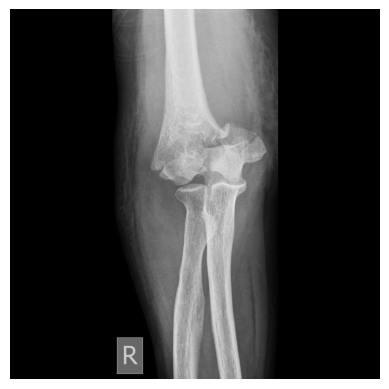

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(r"/content/bone_fracture_data/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
import cv2
import numpy as np

#img
image_path = '/content/bone_fracture_data/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.jpg'
image = cv2.imread(image_path)
h, w, _ = image.shape

# label file
with open('/content/bone_fracture_data/BoneFractureYolo8/train/labels/distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.txt', 'r') as f:
    line = f.readline().strip().split()
    class_id = int(line[0])
    coords = list(map(float, line[1:]))

points = []
for i in range(0, len(coords), 2):
    x = int(coords[i] * w)
    y = int(coords[i+1] * h)
    points.append([x, y])

points = np.array([points], dtype=np.int32)

# Draw the polygon
annotated_image = cv2.polylines(image, points, isClosed=True, color=(0, 0, 255), thickness=2)

# Save or display the result
#cv2.imwrite('annotated_img1.png', annotated_image)
# Or to display:
#cv2.imshow('Annotated', annotated_image)

In [ ]:
#!pip install ultralytics

In [ ]:
# from ultralytics import YOLO

# # Load model
# model = YOLO("yolov8n.pt")  # or yolov8s.pt, yolov8m.pt for bigger models

# # Train
# model.train(data="/content/bone_fracture_data/BoneFractureYolo8/data.yaml", epochs=50, imgsz=640)

In [ ]:
# metrics = model.val()
# metrics

In [ ]:
# results = model.predict(source="/content/bone_fracture_data/BoneFractureYolo8/valid/images", conf=0.25)
# results[0].show()  # Display with bounding boxes


In [ ]:
# img = Image.open(r"/content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_0_png.rf.d29cab92b154a83ca5bf7e40083673a2.jpg")
# plt.imshow(img)
# plt.axis("off")
# plt.show()

In [ ]:
# results[1].show()

In [9]:
!pip install ultralytics
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

Checking yaml is pointing to the same data.

In [10]:
# Path to the data.yaml file
yaml_path = r'/content/bone_fracture_data/BoneFractureYolo8/data.yaml'

# Check YAML content
with open(yaml_path, 'r') as file:
    content = file.read()
    print(content)

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

roboflow:
  workspace: veda
  project: bone-fracture-detection-daoon
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/veda/bone-fracture-detection-daoon/dataset/4


In [ ]:
# Example: Correcting data.yaml paths
# data_yaml_content = """
# path: /content/bone_fracture_data/BoneFractureYolo8
# train: /content/bone_fracture_data/BoneFractureYolo8/train/images
# val: /content/bone_fracture_data/BoneFractureYolo8/valid/images
# nc: 7
# names: ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']
# """

# with open(yaml_path, 'w') as file:
#     file.write(data_yaml_content)

# print("Updated data.yaml file successfully.")

Updated data.yaml file successfully.


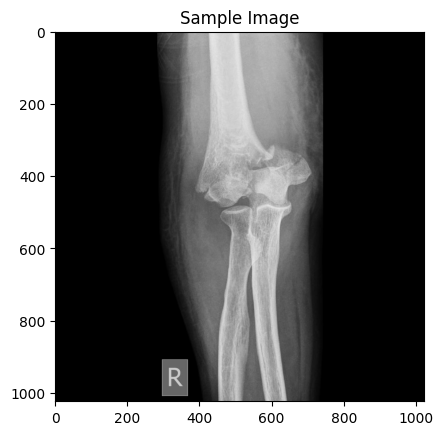

Label Content:
 0 0.35585933923721313 0.3968750014901161 0.4525467435362568 0.3829741733292004 0.4556711770844495 0.47362547689055823 0.3681857266505504 0.48925501404327343


In [11]:
import cv2
import matplotlib.pyplot as plt

# Sample image and label paths
sample_img_path = '/content/bone_fracture_data/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg'
sample_label_path = '/content/bone_fracture_data/BoneFractureYolo8/train/labels/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.txt'

# Display Image
img = cv2.imread(sample_img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample Image")
plt.show()

# Display Label File Content
with open(sample_label_path, 'r') as file:
    label_content = file.read()
    print("Label Content:\n", label_content)


Sample training with smaller epochs

In [13]:
# from ultralytics import YOLO

# # Load the model
# model = YOLO('yolov8s-seg.pt')

# Train the model with early stopping
# model.train(
#     data=yaml_path,
#     epochs=10,
#     imgsz=640,
#     batch=15,
#     project='bone-fracture-seg',
#     name='yolov8-seg',
#     cache='disk',
#     patience=3  # Early stopping if no improvement for 10 consecutive epochs
# )

#)))))))))) (useless)

In [14]:
# # Path to the trained model weights
# weights_path = '/content/bone-fracture-seg/yolov8-seg3/weights/best.pt'

# # Load the model
# model = YOLO(weights_path)

# # Perform inference
# results = model('/content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg')

# # Save the result with red annotations
# results[0].save('/content/bone_fracture_data/BoneFractureYolo8/annotated_image.jpg')

In [15]:
# print(results[0].boxes)
# print(results[0].masks)

In [16]:
# # Perform inference with a lower confidence threshold
# results = model('/content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg', conf=0.25)

# # Save the result
# results[0].save('/content/bone_fracture_data/BoneFractureYolo8/annotated_image_low_conf.jpg')

In [17]:
# # Path to the label file (adjust the filename as needed)
# label_path = '/content/bone_fracture_data/BoneFractureYolo8/test/labels/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.txt'

# with open(label_path, 'r') as file:
#     content = file.readlines()
#     print("Label Content:\n", content)

In [18]:
# import cv2
# import numpy as np

# # Load the image
# image_path = '/content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg'
# image = cv2.imread(image_path)
# h, w, _ = image.shape

# # Load the label file
# with open(label_path, 'r') as f:
#     line = f.readline().strip().split()
#     class_id = int(line[0])
#     coords = list(map(float, line[1:]))

# # Convert normalized coordinates to absolute pixel values
# points = []
# for i in range(0, len(coords), 2):
#     x = int(coords[i] * w)
#     y = int(coords[i+1] * h)
#     points.append([x, y])

# points = np.array([points], dtype=np.int32)

# # Draw the polygon
# annotated_image = cv2.polylines(image, points, isClosed=True, color=(0, 0, 255), thickness=2)

# # Save or display the result
# cv2.imwrite('testannotate.png', annotated_image)
# Or to display:
# cv2.imshow('Annotated', annotated_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [19]:
# !cat /content/bone-fracture-seg/yolov8-seg3/results.txt

In [20]:
# from ultralytics import YOLO

# # Load the model
# model = YOLO('yolov8s-seg.pt')

# Train the model with early stopping
# model.train(
#     data=yaml_path,
#     epochs=55,  # Increased epochs
#     imgsz=960,  # Increased resolution for better fracture detection
#     batch=15,
#     project='bone-fracture-seg',
#     name='yolov8-seg',
#     cache='disk',
#     patience=5  # Early stopping patience
# )

#1hr 35mins

In [21]:
# results = model('/content/bone_fracture_data/BoneFractureYolo8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg')

# results[0].boxes

In [22]:
# results[0].save('/content/bone_fracture_data/BoneFractureYolo8/annotated_image_seg4.jpg')

**THE MODEL DETECTS BONE**

HIGHLIGHT:

Finally the model gives an output. It is able to identify the core part of the entire bone.

In [12]:
# import os
# from ultralytics import YOLO

# model=YOLO("yolov8n-obb.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.26M/6.26M [00:00<00:00, 240MB/s]


In [13]:
# result = model.train(data="/content/bone_fracture_data/BoneFractureYolo8/data.yaml", epochs=30, device=0)

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/bone_fracture_data/BoneFractureYolo8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

100%|██████████| 755k/755k [00:00<00:00, 105MB/s]

Overriding model.yaml nc=15 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-obb summary: 144 layers, 3,083,880 parameters, 3,083,864 gradients, 8.4 GFLOPs

Transferred 391/397 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 368MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.7±2.9 MB/s, size: 12.1 KB)


train: Scanning /content/bone_fracture_data/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:01<00:00, 2112.60it/s]


train: New cache created: /content/bone_fracture_data/BoneFractureYolo8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 41.5±49.8 MB/s, size: 9.2 KB)


val: Scanning /content/bone_fracture_data/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 873.13it/s]


val: New cache created: /content/bone_fracture_data/BoneFractureYolo8/valid/labels.cache
Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       5.7G      2.094      7.027      2.551         22       1024: 100%|██████████| 227/227 [02:23<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.37it/s]

                   all        348        204      0.888     0.0812      0.126     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.72G      1.921      3.871      2.386         11       1024: 100%|██████████| 227/227 [02:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.22it/s]

                   all        348        204      0.283      0.248      0.223     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.73G      1.869        3.2      2.381         17       1024: 100%|██████████| 227/227 [02:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.26it/s]

                   all        348        204      0.198      0.268      0.186      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.75G      1.839      2.953      2.396         19       1024: 100%|██████████| 227/227 [02:17<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        348        204      0.324      0.317      0.258      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.77G      1.789      2.719      2.381         12       1024: 100%|██████████| 227/227 [02:17<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.46it/s]

                   all        348        204      0.354      0.311      0.271      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.79G      1.747      2.472      2.331         20       1024: 100%|██████████| 227/227 [02:17<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.33it/s]

                   all        348        204      0.408      0.315      0.305      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       5.8G      1.696      2.298      2.308         13       1024: 100%|██████████| 227/227 [02:18<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]

                   all        348        204      0.389      0.295      0.317      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.82G      1.685       2.22      2.336         23       1024: 100%|██████████| 227/227 [02:20<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.54it/s]

                   all        348        204      0.513      0.273      0.313       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.84G       1.63      2.098      2.265         21       1024: 100%|██████████| 227/227 [02:16<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.43it/s]

                   all        348        204      0.332      0.389      0.337      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.86G      1.587      1.958      2.227         18       1024: 100%|██████████| 227/227 [02:17<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.16it/s]

                   all        348        204      0.373       0.36      0.294      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.88G      1.566      1.904      2.218         10       1024: 100%|██████████| 227/227 [02:17<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.49it/s]

                   all        348        204      0.416      0.345      0.324       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.89G      1.511      1.757      2.176         12       1024: 100%|██████████| 227/227 [02:16<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.36it/s]

                   all        348        204      0.397      0.362      0.345      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.91G      1.471      1.637      2.134         13       1024: 100%|██████████| 227/227 [02:18<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.38it/s]

                   all        348        204      0.388      0.439      0.335      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.93G      1.452      1.585      2.123         20       1024: 100%|██████████| 227/227 [02:19<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.96it/s]

                   all        348        204      0.442      0.392      0.343      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.95G      1.407      1.527      2.085         14       1024: 100%|██████████| 227/227 [02:16<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.31it/s]

                   all        348        204       0.42      0.347      0.329      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.96G      1.376      1.434      2.028         17       1024: 100%|██████████| 227/227 [02:17<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.39it/s]

                   all        348        204      0.421      0.393      0.361      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.98G       1.33      1.387      1.987         18       1024: 100%|██████████| 227/227 [02:18<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.23it/s]

                   all        348        204      0.404      0.391       0.35      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         6G      1.308      1.332      1.983         13       1024: 100%|██████████| 227/227 [02:17<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.24it/s]

                   all        348        204      0.429      0.379      0.357      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.02G      1.298      1.274      1.959         16       1024: 100%|██████████| 227/227 [02:18<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.78it/s]

                   all        348        204      0.447      0.355      0.347       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.04G      1.273      1.236      1.943         14       1024: 100%|██████████| 227/227 [02:17<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.74it/s]

                   all        348        204      0.403      0.399      0.356      0.172


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.05G      1.136     0.9837      1.879         11       1024: 100%|██████████| 227/227 [02:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.53it/s]

                   all        348        204       0.46      0.367      0.379      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.07G      1.076     0.8509      1.818          6       1024: 100%|██████████| 227/227 [02:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        348        204      0.417      0.413      0.355      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.09G      1.057     0.8401      1.806          8       1024: 100%|██████████| 227/227 [02:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.32it/s]

                   all        348        204      0.435      0.345      0.348      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.11G      1.022     0.7834      1.748          8       1024: 100%|██████████| 227/227 [02:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.43it/s]

                   all        348        204      0.439      0.337      0.334      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.12G      1.001     0.7457      1.736         13       1024: 100%|██████████| 227/227 [02:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.76it/s]

                   all        348        204      0.456      0.339      0.355      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.14G     0.9638     0.7149      1.675         12       1024: 100%|██████████| 227/227 [02:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.56it/s]

                   all        348        204      0.426      0.377      0.352      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.16G     0.9481     0.6768       1.68          7       1024: 100%|██████████| 227/227 [02:08<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.57it/s]


                   all        348        204      0.412      0.354      0.349       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.18G     0.9313     0.6824      1.668         12       1024: 100%|██████████| 227/227 [02:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.93it/s]

                   all        348        204      0.389       0.36      0.351      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.19G     0.8993     0.6369      1.662          8       1024: 100%|██████████| 227/227 [02:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.39it/s]

                   all        348        204      0.397      0.382      0.348      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.21G     0.8942     0.6124        1.6         10       1024: 100%|██████████| 227/227 [02:09<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        348        204      0.418      0.386      0.362      0.186



30 epochs completed in 1.175 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.6MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.6MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 81 layers, 3,078,584 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.26it/s]


                   all        348        204       0.43      0.382      0.361      0.186
        elbow positive         28         29      0.245      0.258      0.166      0.062
      fingers positive         41         48      0.299      0.229      0.208     0.0932
      forearm fracture         37         43      0.818      0.628      0.711      0.407
               humerus         31         36      0.777      0.694      0.731      0.395
     shoulder fracture         19         20      0.347      0.373      0.284      0.124
        wrist positive         17         28     0.0966      0.107     0.0667     0.0351
Speed: 0.5ms preprocess, 4.6ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/obb/train



image 1/1 /content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_1773_png.rf.51512561cfc16438d9c13166f1b5457b.jpg: 1024x832 None45.5ms
Speed: 5.8ms preprocess, 45.5ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 832)


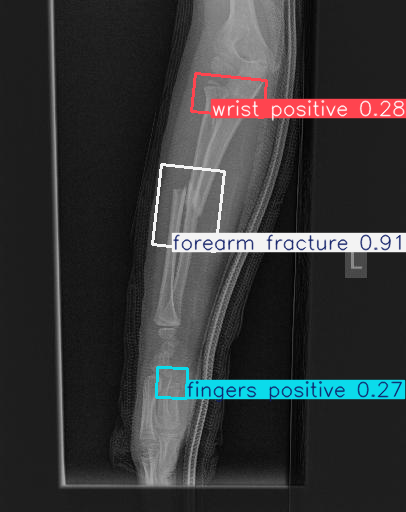

tensor([[[215.1488, 251.9454],
         [224.6565, 171.6157],
         [161.5936, 164.1517],
         [152.0859, 244.4815]],

        [[263.0703, 117.9339],
         [266.5757,  80.6805],
         [195.1136,  73.9562],
         [191.6083, 111.2096]],

        [[186.8759, 398.8138],
         [187.9109, 368.9502],
         [157.8912, 367.9098],
         [156.8561, 397.7733]]], device='cuda:0')


In [14]:
# import matplotlib.pyplot as plt
# import numpy as np
# model = YOLO("/content/runs/obb/train/weights/best.pt")
# source = "/content/bone_fracture_data/BoneFractureYolo8/valid/images/image1_1773_png.rf.51512561cfc16438d9c13166f1b5457b.jpg"
# results = model(source, box=0)  # Run inference with standard bounding boxes
# for result in results:
#     result.show()  # Show annotated image

#     # Extract OBB information (if available)
#     if result.obb is not None:
#         obb_results = result.obb.xyxyxyxy  # OBB coordinates in xywh format
#         print(obb_results)

In [15]:
# !zip -r runs.zip runs/

  adding: runs/ (stored 0%)
  adding: runs/obb/ (stored 0%)
  adding: runs/obb/train/ (stored 0%)
  adding: runs/obb/train/val_batch0_pred.jpg (deflated 21%)
  adding: runs/obb/train/val_batch0_labels.jpg (deflated 20%)
  adding: runs/obb/train/R_curve.png (deflated 11%)
  adding: runs/obb/train/F1_curve.png (deflated 9%)
  adding: runs/obb/train/args.yaml (deflated 52%)
  adding: runs/obb/train/train_batch1.jpg (deflated 16%)
  adding: runs/obb/train/val_batch1_labels.jpg (deflated 12%)
  adding: runs/obb/train/results.csv (deflated 59%)
  adding: runs/obb/train/labels_correlogram.jpg (deflated 37%)
  adding: runs/obb/train/confusion_matrix.png (deflated 24%)
  adding: runs/obb/train/train_batch0.jpg (deflated 18%)
  adding: runs/obb/train/train_batch2.jpg (deflated 14%)
  adding: runs/obb/train/val_batch2_labels.jpg (deflated 8%)
  adding: runs/obb/train/confusion_matrix_normalized.png (deflated 20%)
  adding: runs/obb/train/train_batch4542.jpg (deflated 24%)
  adding: runs/obb/train

In [16]:
# from ultralytics import YOLO

# model = YOLO("/content/runs/obb/train/weights/best.pt")

# # Export == ONNX
# model.export(format="onnx")

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv8n-obb summary (fused): 81 layers, 3,078,584 parameters, 0 gradients, 8.3 GFLOPs

PyTorch: starting from '/content/runs/obb/train/weights/best.pt' with input shape (1, 3, 1024, 1024) BCHW and output shape(s) (1, 12, 21504) (6.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.6/145.6 kB 378.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 234.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 196.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 297.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.6s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim>=0.1.46', 'onnxruntime-gpu']
WARNING ⚠️ requirements: Resta

'/content/runs/obb/train/weights/best.onnx'

**====================================== CONNECT AND RUN CELLS FROM HERE ======================================**

For onnx :

1)Need onnx and onnxruntime

In [8]:
!pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00


In [9]:
import onnx

# Path to your ONNX model
model_path = "/content/drive/MyDrive/boneai/best_locator.onnx"

# Load the ONNX model
onnx_model = onnx.load(model_path)

# Check the model for any structural issues
onnx.checker.check_model(onnx_model)
print("ONNX model is valid.")


ONNX model is valid.


In [12]:
import onnxruntime as ort
import numpy as np

# Load the ONNX model
ort_session = ort.InferenceSession(model_path)

# Get model input details
input_name = ort_session.get_inputs()[0].name
input_shape = ort_session.get_inputs()[0].shape
input_type = ort_session.get_inputs()[0].type

print(f"Input name: {input_name}")
print(f"Input shape: {input_shape}")
print(f"Input type: {input_type}")

# Example input (adjust dimensions as per model input shape)
dummy_input = np.random.randn(1, 3, 1024, 1024).astype(np.float32)

# Run inference
outputs = ort_session.run(None, {input_name: dummy_input})

# Inspect output
print("Output:", outputs[0].shape)

# Error logs :

# InvalidArgument: [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Got invalid dimensions for input: images for the following indices
#  index: 2 Got: 640 Expected: 1024
#  index: 3 Got: 640 Expected: 1024
#  Please fix either the inputs/outputs or the model.


Input name: images
Input shape: [1, 3, 1024, 1024]
Input type: tensor(float)
Output: (1, 12, 21504)


In [13]:
# import cv2
# import numpy as np

# # Path to the input image
# image_path = "/content/bone_fracture_data/BoneFractureYolo8/valid/images/coronoid-process-fracture_jpg.rf.71650459c69a9734ecd545067cf18bf4.jpg"

# # Load the image
# image = cv2.imread(image_path)

# # Resize to 640x640 (assuming YOLO input size)
# input_size = (640, 640)
# image_resized = cv2.resize(image, input_size)

# # Convert to float32 and normalize to [0, 1]
# image_resized = image_resized.astype(np.float32) / 255.0

# # Convert HWC to CHW
# image_transposed = np.transpose(image_resized, (2, 0, 1))

# # Add batch dimension
# input_tensor = np.expand_dims(image_transposed, axis=0)

# print(f"Input shape: {input_tensor.shape}")

Input shape: (1, 3, 640, 640)


In [22]:
# Required Libraries
import os
import cv2
import numpy as np
import onnxruntime as ort
import matplotlib.pyplot as plt

# Paths
model_path = '/content/drive/MyDrive/boneai/best_locator.onnx'  # Update this path
image_path = '/content/bone_fracture_data/BoneFractureYolo8/valid/images/coronoid-process-fracture_jpg.rf.71650459c69a9734ecd545067cf18bf4.jpg'

# Load the ONNX model
ort_session = ort.InferenceSession(model_path)

# Get model input details
input_name = ort_session.get_inputs()[0].name
input_shape = ort_session.get_inputs()[0].shape

# Preprocessing Function
def preprocess_image(img_path, input_shape):
    # Load and resize image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (input_shape[2], input_shape[3]))

    # Normalize and transpose
    img_resized = img_resized.astype(np.float32) / 255.0
    img_transposed = np.transpose(img_resized, (2, 0, 1))  # HWC to CHW
    img_input = np.expand_dims(img_transposed, axis=0)

    return img_input, img

# Preprocess the input image
input_tensor, original_image = preprocess_image(image_path, input_shape)

# Run inference
outputs = ort_session.run(None, {input_name: input_tensor})
preds = outputs[0]
# Reshape predictions
batch_size, num_channels, grid_size = preds.shape
print(f"Prediction shape before reshape: {preds.shape}")
print(f"Number of channels: {num_channels}")
print(f"Grid size: {grid_size}")
preds = preds.reshape(batch_size, num_channels, int(np.sqrt(grid_size)), int(np.sqrt(grid_size)))

# Parameters
confidence_threshold = 0.5

# Class colors and names
colors = [(255, 0, 0), (0, 255, 255), (255, 255, 255), (128, 0, 128), (0, 255, 0), (0, 128, 255), (255, 165, 0)]
class_names = ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

# Postprocessing and Visualization
def visualize_obb_predictions(image, preds, input_shape):
    input_height, input_width = input_shape[2], input_shape[3]
    orig_height, orig_width = image.shape[:2]

    scale_x = orig_width / input_width
    scale_y = orig_height / input_height

    for y in range(preds.shape[2]):
        for x in range(preds.shape[3]):
            pred = preds[0, :, y, x]
            cx, cy, w, h, angle, conf = pred[:6]

            conf = 1 / (1 + np.exp(-conf))
            if conf < confidence_threshold:
                continue

            cls_scores = pred[7:]
            cls = int(np.argmax(cls_scores))
            if cls >= len(class_names):
                continue

            # Convert normalized to input image scale
            cx *= input_width
            cy *= input_height
            w *= input_width
            h *= input_height

            # Scale to original image size
            cx *= scale_x
            cy *= scale_y
            w *= scale_x
            h *= scale_y

            # Convert to OpenCV rotated rect format
            # angle may need to be converted from radians to degrees if necessary
            box = ((cx, cy), (w, h), np.degrees(angle))  # if angle is in radians
            # box = ((cx, cy), (w, h), angle)  # if already in degrees

            box_points = cv2.boxPoints(box).astype(np.int32)
            color = colors[cls]
            label = f"{class_names[cls]} {conf:.2f}"

            cv2.polylines(image, [box_points], isClosed=True, color=color, thickness=2)
            cv2.putText(image, label, (box_points[0][0], box_points[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Visualize
visualize_obb_predictions(original_image.copy(), preds, input_shape)

# ValueError                                Traceback (most recent call last)
# <ipython-input-19-a536f60588e4> in <cell line: 0>()
#      40 # Reshape predictions
#      41 batch_size, num_channels, grid_size = preds.shape
# ---> 42 preds = preds.reshape(batch_size, num_channels, int(np.sqrt(grid_size)), int(np.sqrt(grid_size)))
#      43
#      44 # Parameters

# ValueError: cannot reshape array of size 258048 into shape (1,12,146,146)

Prediction shape before reshape: (1, 12, 21504)
Number of channels: 12
Grid size: 21504


ValueError: cannot reshape array of size 258048 into shape (1,12,146,146)